### 相关库的导入

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import sys
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# pd.set_option('display.max_rows', 100,'display.max_columns', 1000,"display.max_colwidth",1000,'display.width',1000)
import pickle

from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.neural_network import *
from sklearn.tree import *
from sklearn.ensemble import *
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import *


### 读取数据并划分集合

In [3]:
data = pd.read_csv('../data/deal/train_set.csv',index_col=0)
Y = data['总价']
X = data.drop(columns=['总价','单价'],inplace=True)
data['建筑结构'].fillna(data['建筑结构'].mode()[0],inplace=True)
data['装修情况'].fillna(data['装修情况'].mode()[0],inplace=True)

In [4]:
data

,所在楼层,建筑面积,户型结构,建筑类型,建筑结构,装修情况,配备电梯,交易权属,房屋用途,房屋年限,...,房屋朝向_北,房屋朝向_南,房屋朝向_南 北,房屋朝向_南 西 北,房屋朝向_西,房屋朝向_西北,房屋朝向_西南,小区平均关注度,小区平均房价,城市平均房价
0,18,134.68,0,1,0.0,0.0,1,0,0,13,...,False,False,True,False,False,False,False,20.263158,73752.894737,46921.133711
1,30,138.03,0,1,1.0,0.0,1,0,0,12,...,False,False,True,False,False,False,False,10.000000,58462.187500,46921.133711
2,20,65.01,0,1,0.0,0.0,1,0,1,9,...,False,False,False,False,False,False,True,18.928571,39489.750000,46921.133711
3,18,46.49,0,0,0.0,0.0,1,0,1,6,...,False,True,False,False,False,False,False,13.487805,36209.463415,46921.133711
4,21,49.13,0,1,0.0,0.0,1,0,1,6,...,False,True,False,False,False,False,False,13.521739,38897.434783,46921.133711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29016,9,88.21,0,0,0.0,0.0,1,0,0,9,...,False,False,True,False,False,False,False,17.054054,33348.594595,37774.972667
29017,11,91.96,0,0,0.0,1.0,1,0,0,7,...,False,True,False,False,False,False,False,10.571429,34617.035714,37774.972667
29018,24,89.78,0,1,0.0,1.0,1,0,0,5,...,False,False,True,False,False,False,False,19.833333,32727.125000,37774.972667
29019,11,126.93,0,0,0.0,0.0,1,0,0,8,...,False,False,True,False,False,False,False,14.964286,22614.464286,37774.972667


In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### 定义评价指标

In [6]:
# 评价指标函数定义，其中R2的指标可以由模型自身得出，后面的score即为R2
def evaluation(model):
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test, ypred)
    mse = mean_squared_error(y_test, ypred)
    rmse = math.sqrt(mse)
    print("MAE: %.2f" % mae)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % rmse)
    return ypred

### 线性回归

In [91]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
print("params: ", model_LR.get_params())
print("train score: ", model_LR.score(x_train, y_train))
print("test score: ", model_LR.score(x_test, y_test))
predict_y = evaluation(model_LR)

params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
train score:  0.8894878169021547
test score:  -4051176518742.244
MAE: 42916523.35
MSE: 475938976764042880.00
RMSE: 689883306.63


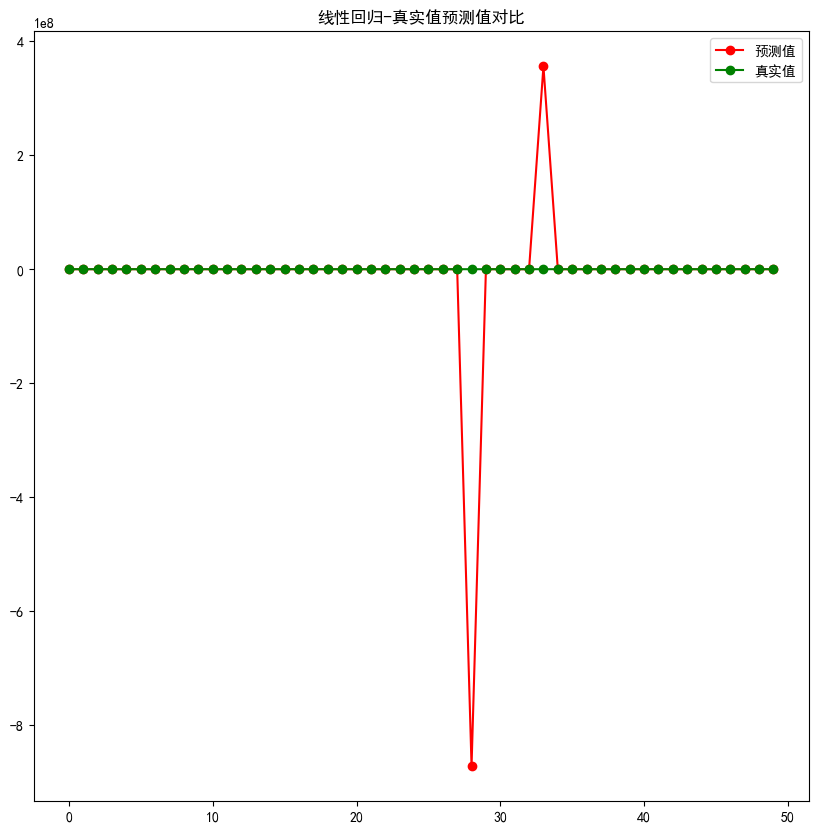

In [92]:
plt.figure(figsize=(10,10))
plt.title('线性回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(y_test[:50], 'go-', label='真实值')
plt.legend()
plt.show()

### k近邻

In [93]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)
print("params: ", model_knn.get_params())
print("train score: ", model_knn.score(x_train, y_train))
print("test score: ", model_knn.score(x_test, y_test))
predict_y = evaluation(model_knn)

params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
train score:  0.8803627760264684
test score:  0.753296255898336
MAE: 60.19
MSE: 28983.17
RMSE: 170.24


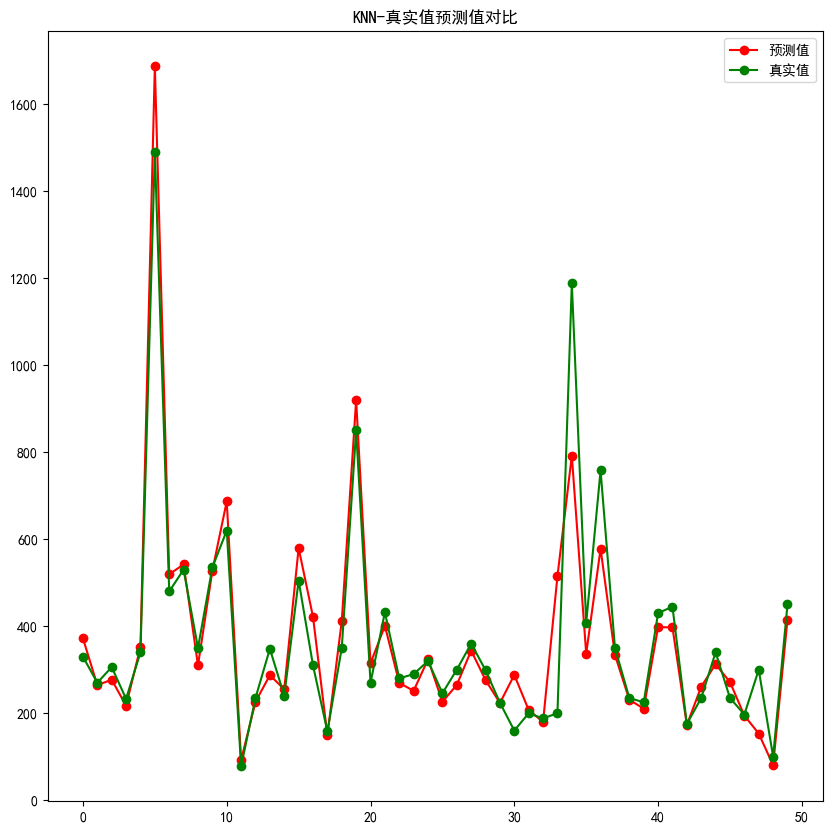

In [94]:
plt.figure(figsize=(10,10))
plt.title('KNN-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(y_test[:50], 'go-', label='真实值')
plt.legend()
plt.show()

### 决策树回归

In [95]:
model_dtr = DecisionTreeRegressor(max_depth=20 ,random_state=30)
model_dtr.fit(x_train, y_train)
print("params: ", model_dtr.get_params())
print("train score: ", model_dtr.score(x_train, y_train))
print("test score: ", model_dtr.score(x_test, y_test))
predict_y = evaluation(model_dtr)

params:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 30, 'splitter': 'best'}
train score:  0.9989066530895192
test score:  0.9066791126335909
MAE: 36.33
MSE: 10963.49
RMSE: 104.71


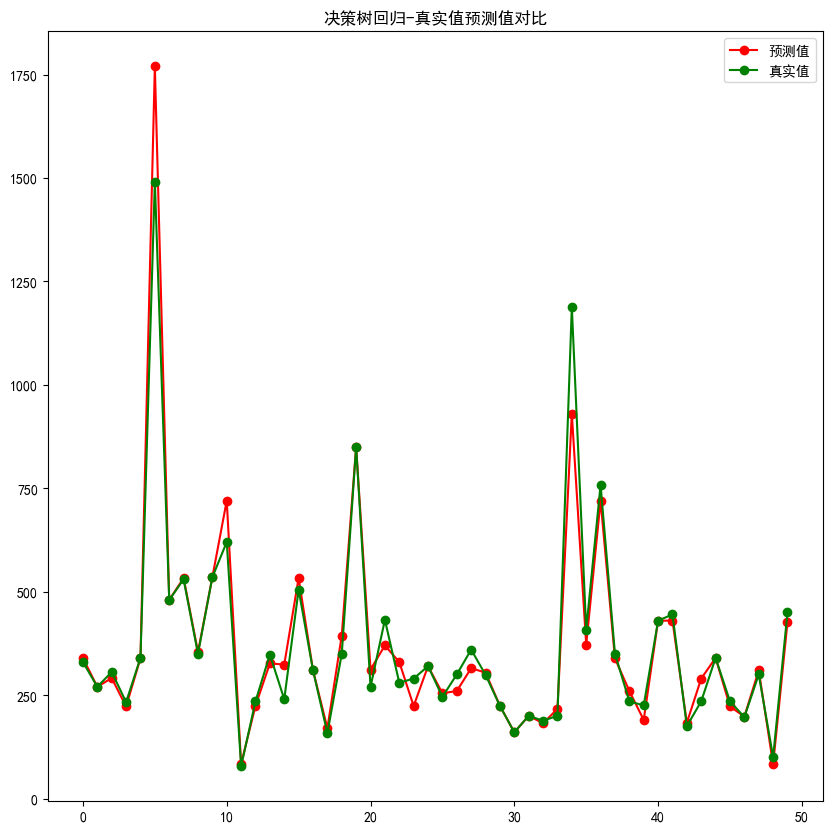

In [96]:
plt.figure(figsize=(10,10))
plt.title('决策树回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(y_test[:50], 'go-', label='真实值')
plt.legend()
plt.show()

### 随机森林

In [97]:
model_rfr = RandomForestRegressor(random_state=30,n_jobs=-1)
model_rfr.fit(x_train, y_train)
print("params: ", model_rfr.get_params())
print("train score: ", model_rfr.score(x_train, y_train))
print("test score: ", model_rfr.score(x_test, y_test))
predict_y = evaluation(model_rfr)

params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}
train score:  0.9920454421668223
test score:  0.9255303633130694
MAE: 30.08
MSE: 8748.82
RMSE: 93.54


In [7]:
pickle.dump(model_rfr,open(f'../data/model/randomForest.pkl','wb'))

NameError: name 'model_rfr' is not defined

In [ ]:
plt.figure(figsize=(8,8))
plt.title('随机森林-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(y_test[:50], 'go-', label='真实值')
plt.legend()
plt.show()

### XBOOST

In [100]:
model_xgb = xgb.XGBRegressor(n_jobs=-1,learning_rate=0.05,max_depth=40,n_estimators=150,subsample=0.5)
model_xgb.fit(x_train,y_train)
print('params: ',model_xgb.get_params())
print('train score: ',model_xgb.score(x_train,y_train))
print('test score: ',model_xgb.score(x_test,y_test))
predict_y = evaluation(model_xgb)

params:  {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 40, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 150, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
train score:  0.9982751312008338
test score:  0.9154023966734347
MAE: 29.41
MSE: 9938.67
RMSE: 9

In [102]:
pickle.dump(model_xgb,open(f'../data/model/xgboost.pkl','wb'))

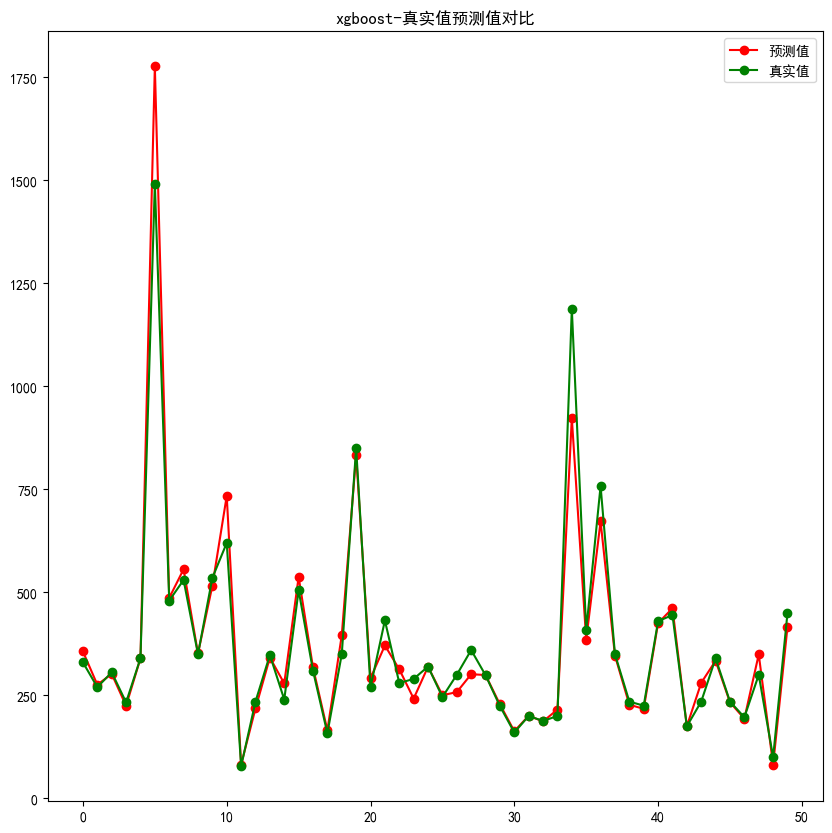

In [101]:
plt.figure(figsize=(10,10))
plt.title('xgboost-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(y_test[:50], 'go-', label='真实值')
plt.legend()
plt.show()

### 读取模型并测试

In [8]:
model = pickle.load(open('../data/model/randomForest.pkl' ,'rb'))
print("params: ", model.get_params())
print("train score: ", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))
predict_y = evaluation(model)

params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}
train score:  0.9920454421668223
test score:  0.9255303633130694
MAE: 30.08
MSE: 8748.82
RMSE: 93.54


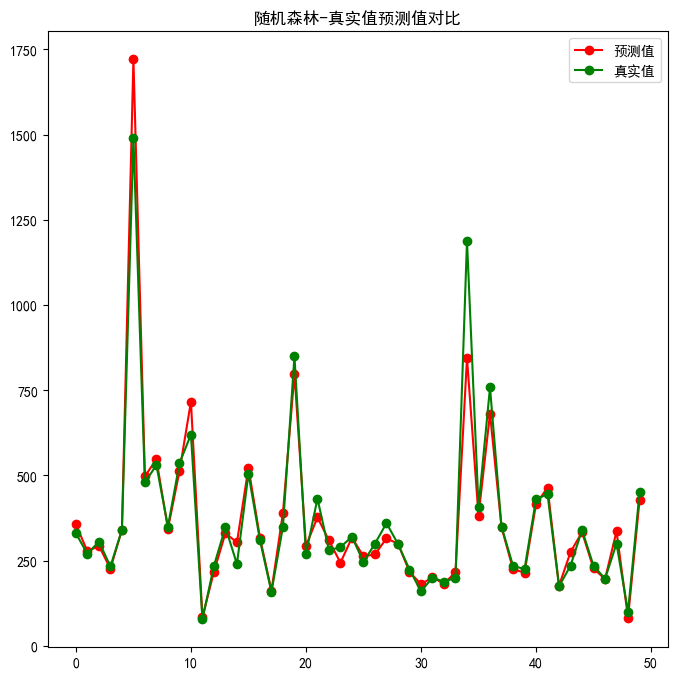

In [9]:
plt.figure(figsize=(8,8))
plt.title('随机森林-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(y_test[:50], 'go-', label='真实值')
plt.legend()
plt.show()

### 计算特征重要性

In [ ]:
import gc
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


features = pd.get_dummies(x_train)
feature_names = list(features.columns)
features = np.array(features)
labels = np.array(y_train).reshape((-1, ))
feature_importance_values = np.zeros(len(feature_names))
task='regression'
early_stopping=True
eval_metric= 'l2'
n_iterations=10

for _ in range(n_iterations):
    if task == 'classification':
        model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)
    if task =='regression':
        model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)
    else:
        raise ValueError('Task must be either "classification" or "regression"')
    #提前终止训练，需要验证集
    if early_stopping:
        train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15)
  # Train the model with early stopping
        model.fit(train_features, train_labels, eval_metric = eval_metric,eval_set = [(valid_features, valid_labels)])
        gc.enable()
        del train_features, train_labels, valid_features, valid_labels
        gc.collect()

    else:
        model.fit(features, labels)
  # Record the feature importances
    feature_importance_values += model.feature_importances_ / n_iterations
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

In [ ]:
# 按照重要性大小对特征进行排序
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)
feature_importances
#计算特征的相对重要性，全部特征的相对重要性之和为1
feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()

#计算特征的累计重要性
#cutsum :返回给定 axis 上的累计和
feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

#选取累计重要性大于0.99的特征，这些特征将会被删除掉。
drop_columns=list(feature_importances.query('cumulative_importance>0.6137')['feature'])
feature_importances

### 调参

In [ ]:
# 随机收索
from sklearn.model_selection import RandomizedSearchCV
#2.设置参数空间
from hyperopt import hp
space_forest = {
    'bootstrap':[True,False],
    'max_features':list(range(0,25,1)),
    'max_depth': list(range(0, 100, 1)),
    'n_estimators': list(range(30, 150, 1))
}
#随机搜索，利用5折交叉验证得分来作为模型优劣的判断标准
forest_reg=RandomForestRegressor()
random_search=RandomizedSearchCV(forest_reg, space_forest,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
random_search.fit(x_train,y_train)

In [ ]:
# 贝叶斯优化
from hyperopt import hp
space = {
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'max_depth': hp.quniform('max_depth', 0, 100, 1),
    'n_estimators': hp.quniform('n_estimators', 30, 150, 1)
}

In [ ]:
#定义优化函数，即为5折交叉验证的得分
from sklearn.model_selection import cross_val_score
def objective(params, n_folds=5):
    num_leaf=int(params['num_leaves'])
    estimator=int(params['n_estimators'])
    rate=params['learning_rate']
    sub_for_bin=int(params['subsample_for_bin'])
    max_dep=int(params['max_depth'])
    lgb_reg=lgb.LGBMRegressor(num_leaves=num_leaf,n_estimators = estimator,learning_rate=rate,subsample_for_bin=sub_for_bin,max_depth=max_dep)
    lgb_reg.fit(x_train,y_train)
    scores=cross_val_score(lgb_reg,x_train,y_train,scoring='neg_mean_absolute_error',cv=5)
    mae_scores=np.abs(scores)
    loss=mae_scores.mean()
    return loss

In [ ]:
#寻找到使优化函数最小超参数组合，利用hyperopt中的fmin来求最小化
from hyperopt import Trials,fmin,tpe
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 500)